## starting the project of temperature prediction by RNN Lstm model


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

## Load and showing the data from csv file

In [2]:

# Load the data from the CSV file
df = pd.read_csv('dataResearch.csv')

# Assuming your DataFrame has columns 'Date' and 'Temperature (Average)'
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Extract the temperature column
data = df['Temperature(Average)'].values.reshape(-1, 1)


In [41]:
df.head(24)

,SL.,Station,Year,Month,Temperature (maximum),Temperature(minimum),Temperature(Average),Rainfall(mm),Humidity(percentage),Variation Rate
Date,,,,,,,,,,
1970-01-01,1,Sylhet (10705),1970,1,23.90,11.37,17.635,62,76.52,NaN
1970-01-02,2,Sylhet (10705),1970,2,26.85,14.07,20.460,65,67.96,2.825
1970-01-03,3,Sylhet (10705),1970,3,29.92,17.86,23.890,60,66.26,3.430
1970-01-04,4,Sylhet (10705),1970,4,30.96,21.65,26.305,466,76.10,2.415
1970-01-05,5,Sylhet (10705),1970,5,31.22,23.08,27.150,851,80.84,0.845
1970-01-06,6,Sylhet (10705),1970,6,30.81,24.71,27.760,955,88.03,0.610
1970-01-07,7,Sylhet (10705),1970,7,30.11,24.62,27.365,1076,89.68,-0.395
1970-01-08,8,Sylhet (10705),1970,8,31.09,25.16,28.125,662,87.10,0.760
1970-01-09,9,Sylhet (10705),1970,9,30.40,24.67,27.535,622,87.93,-0.590


# scaling the data 

In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)



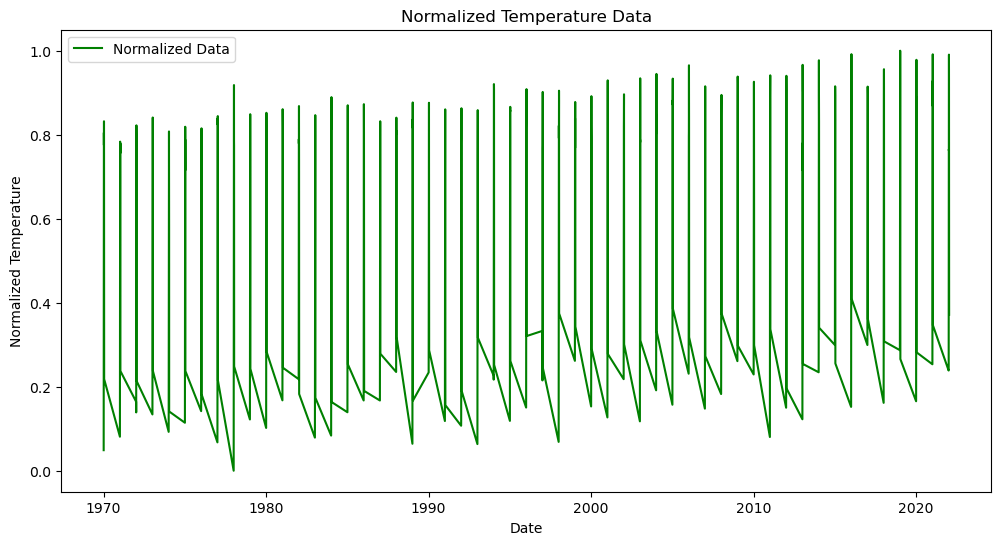

In [5]:
# Plot the normalized data
plt.figure(figsize=(12, 6))
plt.plot(df.index, data_scaled, label='Normalized Data', color='green')
plt.title('Normalized Temperature Data')
plt.xlabel('Date')
plt.ylabel('Normalized Temperature')
plt.legend()
plt.show()

# Data analysis 


In [7]:
import pandas as pd

# Load your data
df = pd.read_csv('dataResearch.csv')

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Iterate through each 10-year interval from 1970 to 2020
for start_year in range(1970, 2021, 10):
    end_year = start_year + 9
    
    # Filter data for the current 10-year interval
    current_decade_data = df[f'{start_year}-01-01':f'{end_year}-12-31']
    
    # Calculate the average temperature for the current 10-year interval
    average_temperature = current_decade_data['Temperature(Average)'].mean()
    
    # Display the result
    print(f'Average Temperature for {start_year}-{end_year}: {average_temperature:.2f} °C')


Average Temperature for 1970-1979: 24.58 °C
Average Temperature for 1980-1989: 24.84 °C
Average Temperature for 1990-1999: 25.21 °C
Average Temperature for 2000-2009: 25.68 °C
Average Temperature for 2010-2019: 25.96 °C
Average Temperature for 2020-2029: 26.21 °C


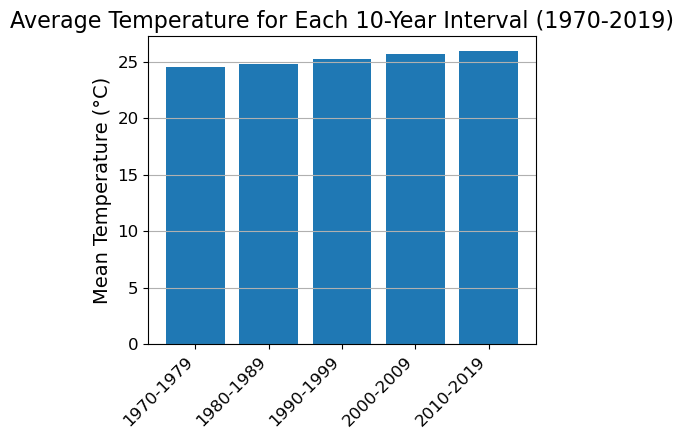

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('dataResearch.csv')

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Lists to store data for plotting
decades = []
average_temperatures = []

# Iterate through each 10-year interval from 1970 to 2020
for start_year in range(1970, 2019, 10):
    end_year = start_year + 9
    
    # Filter data for the current 10-year interval
    current_decade_data = df[f'{start_year}-01-01':f'{end_year}-12-31']
    
    # Calculate the average temperature for the current 10-year interval
    average_temperature = current_decade_data['Temperature(Average)'].mean()
    
    # Store data for plotting
    decades.append(f'{start_year}-{end_year}')
    average_temperatures.append(average_temperature)

# Calculate the average temperature for the period 2020-2022
average_temperature_2020_2022 = df['2020-01-01':'2019-12-31']['Temperature(Average)'].mean()

# Append data for 2020-2022 to the lists
decades.append('2020-2019')
average_temperatures.append(average_temperature_2020_2022)

# Plotting the data
plt.figure(figsize=(5, 4))
plt.bar(decades, average_temperatures, color='#1f78b4')
plt.title('Average Temperature for Each 10-Year Interval (1970-2019)', fontsize=16)

plt.ylabel('Mean Temperature (°C)', fontsize=14)
plt.grid(axis='y')

# Manually adjust the position of the x-axis label to add a top gap
plt.gca().xaxis.set_label_coords(0.5, -0.1)

# Customize x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Customize y-axis labels
plt.yticks(fontsize=12)

plt.show()


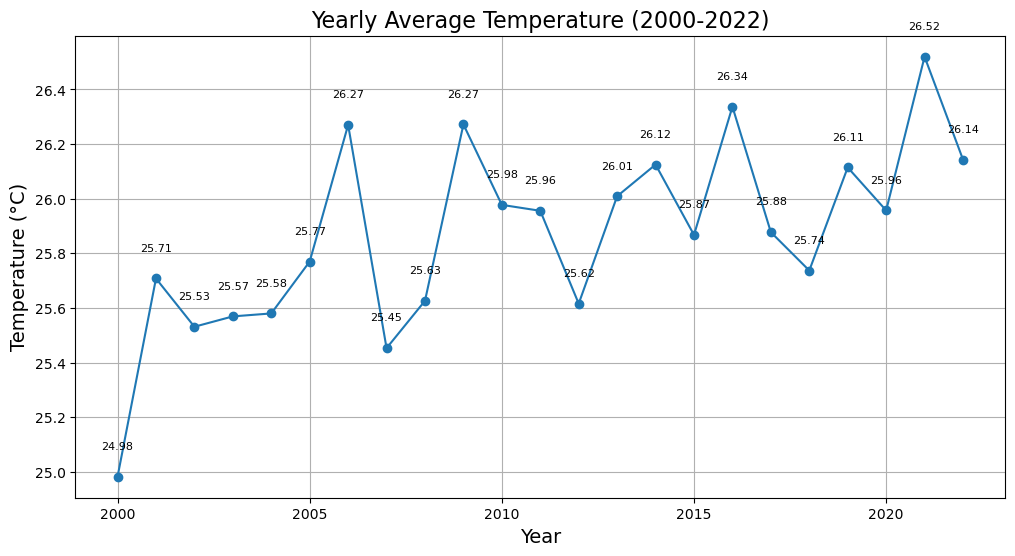

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('dataResearch.csv')

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Filter data for the range 2000 to 2022
df_2000_2022 = df['2000-01-01':'2022-12-31']

# Calculate yearly average temperatures
yearly_avg_temperatures = df_2000_2022['Temperature(Average)'].resample('Y').mean()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temperatures.index.year, yearly_avg_temperatures.values, marker='o', linestyle='-', color='#1f78b4')

# Annotate the temperature values on the plot
for i, value in enumerate(yearly_avg_temperatures.values):
    plt.text(yearly_avg_temperatures.index.year[i], value + 0.1, f'{value:.2f}', ha='center', fontsize=8)

plt.title('Yearly Average Temperature (2000-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(True)
plt.show()


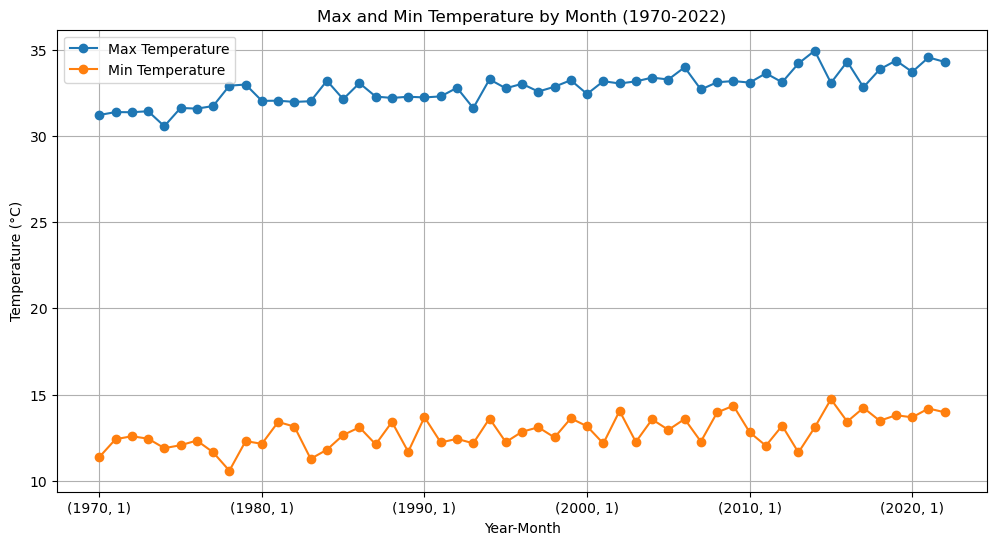

In [10]:
# Extract year and month from the date
df['Year'] = df.index.year
df['Month'] = df.index.month

# Group by year and month, then find the maximum and minimum values
max_temps = df.groupby(['Year', 'Month'])['Temperature (maximum)'].max()
min_temps = df.groupby(['Year', 'Month'])['Temperature(minimum)'].min()

# Plotting the data
plt.figure(figsize=(12, 6))
max_temps.plot(marker='o', linestyle='-', label='Max Temperature')
min_temps.plot(marker='o', linestyle='-', label='Min Temperature')

plt.title('Max and Min Temperature by Month (1970-2022)')
plt.xlabel('Year-Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

## Temperature prediction section start here

In [11]:
# Function to create dataset with input features and target variable
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

In [12]:
# Define the number of time steps
time_steps = 12  # You may adjust this based on the seasonality of your data

# Create the dataset
X, y = create_dataset(data_scaled, time_steps)

# Reshape the input data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


## Lstm model building

In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


# model training


In [14]:

# Train the model
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
20/20 [==============================] - 4s 8ms/step - loss: 0.1396
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0726
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0684
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0625
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0565
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0469
Epoch 7/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0299
Epoch 8/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 9/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 10/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 11/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 12/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 13/50
20/20 [==============================

In [42]:
# Forecast future temperatures
forecast_data = data_scaled[-time_steps:]  # Use the last 'time_steps' data points for forecasting

for i in range(24):  # Forecasting for the next 2 years
    input_data = forecast_data[-time_steps:].reshape(1, time_steps, 1)
    predicted_temperature = model.predict(input_data)
    forecast_data = np.append(forecast_data, predicted_temperature)


1/1 [==============================] - 0s 20ms/step


In [43]:
# Inverse transform the scaled data to get the actual temperatures
forecast_data = scaler.inverse_transform(forecast_data.reshape(-1, 1))


# Forecast graph

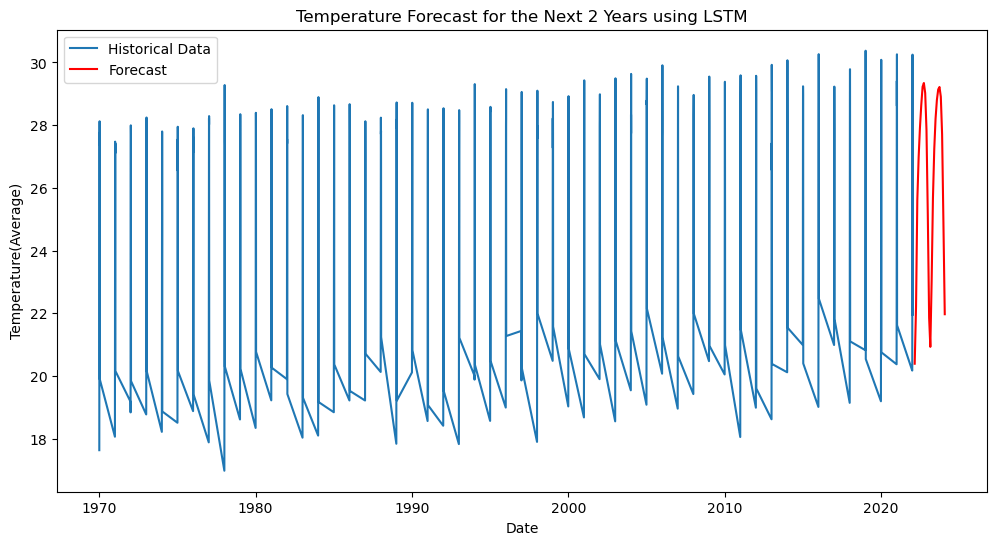

In [17]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature(Average)'], label='Historical Data')
plt.plot(pd.date_range(start=df.index[-1], periods=25, freq='M')[1:], forecast_data[-24:], color='red', label='Forecast')

plt.title('Temperature Forecast for the Next 2 Years using LSTM')
plt.xlabel('Date')
plt.ylabel('Temperature(Average)')
plt.legend()
plt.show()

# Model accuracy finding

In [44]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f'Mean Squared Error: {mse}')
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


4/4 [==============================] - 0s 4ms/step
Mean Squared Error: 0.8573213759027948
Root Mean Squared Error: 0.9259165059025543


In [45]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test_inverse, y_pred_inverse)
print(f'R-squared: {r2}')

# Convert R-squared to percentage
accuracy_percentage = r2 * 100
print(f'Model Accuracy: {accuracy_percentage:.2f}%')


R-squared: 0.9221041853969104
Model Accuracy: 92.21%


# predicted value

In [21]:
# Forecast future temperatures for the next 2 years
forecast_data = data_scaled[-time_steps:]  # Use the last 'time_steps' data points for forecasting
forecast_values = []

for i in range(36):  # Forecasting for the next 2 years
    input_data = forecast_data[-time_steps:].reshape(1, time_steps, 1)
    predicted_temperature = model.predict(input_data)
    forecast_data = np.append(forecast_data, predicted_temperature)
    forecast_values.append(predicted_temperature[0, 0])

# Inverse transform the scaled data to get the actual temperatures
forecast_data = scaler.inverse_transform(forecast_data.reshape(-1, 1))

# Create a DataFrame for the predicted temperatures
date_range = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=36, freq='M')
predicted_df = pd.DataFrame(data=forecast_data[-36:], columns=['Temperature (Average)'], index=date_range)

# Display the resulting DataFrame
print("Predicted Portion:")
print(predicted_df)

1/1 [==============================] - 0s 19ms/step
Predicted Portion:
            Temperature (Average)
2022-02-28              20.392591
2022-03-31              22.209861
2022-04-30              25.615659
2022-05-31              26.981665
2022-06-30              27.910040
2022-07-31              28.638391
2022-08-31              29.224614
2022-09-30              29.345433
2022-10-31              29.025639
2022-11-30              27.856952
2022-12-31              25.122594
2023-01-31              21.857098
2023-02-28              20.930316
2023-03-31              23.052993
2023-04-30              25.675403
2023-05-31              27.242792
2023-06-30              28.206022
2023-07-31              28.802146
2023-08-31              29.140633
2023-09-30              29.217914
2023-10-31              28.908385
2023-11-30              27.709761
2023-12-31              24.881191
2024-01-31              21.971147
2024-02-29              21.589065
2024-03-31              23.752741
2024-04-30 

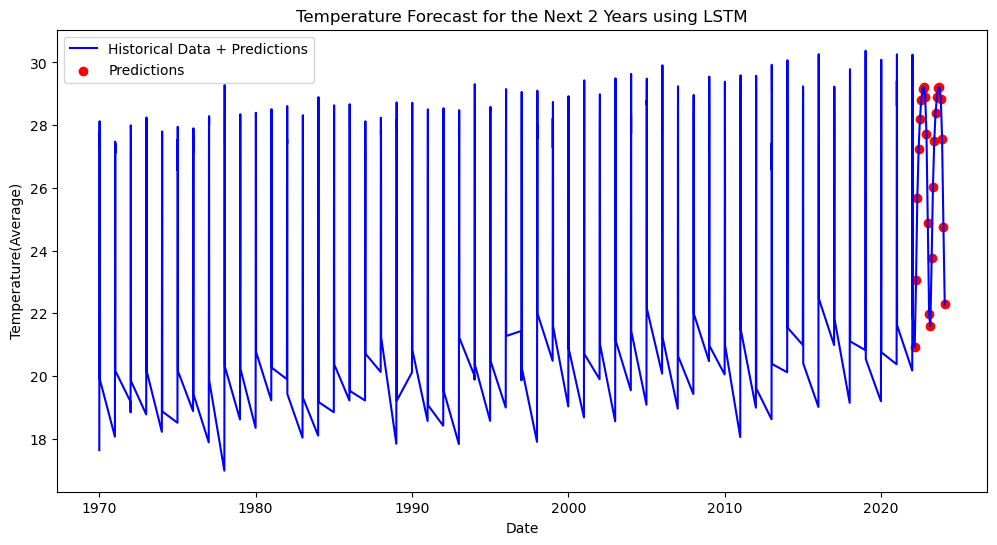

In [23]:
# Create a DataFrame for the predicted temperatures
date_range = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
predicted_df = pd.DataFrame(data=forecast_data[-24:], columns=['Temperature(Average)'], index=date_range)

# Concatenate the original data and predicted data
result_df = pd.concat([df, predicted_df])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(result_df.index, result_df['Temperature(Average)'], label='Historical Data + Predictions', color='blue')
plt.scatter(predicted_df.index, predicted_df['Temperature(Average)'], label='Predictions', color='red')
plt.title('Temperature Forecast for the Next 2 Years using LSTM')
plt.xlabel('Date')
plt.ylabel('Temperature(Average)')
plt.legend()
plt.show()

# Temperature change rate

In [24]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('dataResearch.csv')

# Assuming your DataFrame has columns 'Date' and 'Temperature (Average)'
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate the rate of change (variation rate)
df['Variation Rate'] = df['Temperature(Average)'].diff()

# Select data for the last 10 years
last_10_years = df.index.year >= df.index.year.max() - 10
last_10_years_data = df[last_10_years]

# Calculate the annual temperature change rate
annual_change_rate = last_10_years_data.resample('Y')['Variation Rate'].mean()

# Print the annual temperature change rates
print("Annual Temperature Change Rates for the Last 10 Years:")
print(annual_change_rate)


Annual Temperature Change Rates for the Last 10 Years:
Date
2012-12-31   -0.157500
2013-12-31    0.065417
2014-12-31    0.096250
2015-12-31   -0.095000
2016-12-31    0.172083
2017-12-31   -0.054167
2018-12-31   -0.059167
2019-12-31   -0.047083
2020-12-31    0.017917
2021-12-31    0.072083
2022-12-31    0.027917
Freq: A-DEC, Name: Variation Rate, dtype: float64


Annual Temperature Change Rates for the Last 10 Years:
Date
2012-12-31   -0.157500
2013-12-31    0.065417
2014-12-31    0.096250
2015-12-31   -0.095000
2016-12-31    0.172083
2017-12-31   -0.054167
2018-12-31   -0.059167
2019-12-31   -0.047083
2020-12-31    0.017917
2021-12-31    0.072083
2022-12-31    0.027917
Freq: A-DEC, Name: Variation Rate, dtype: float64


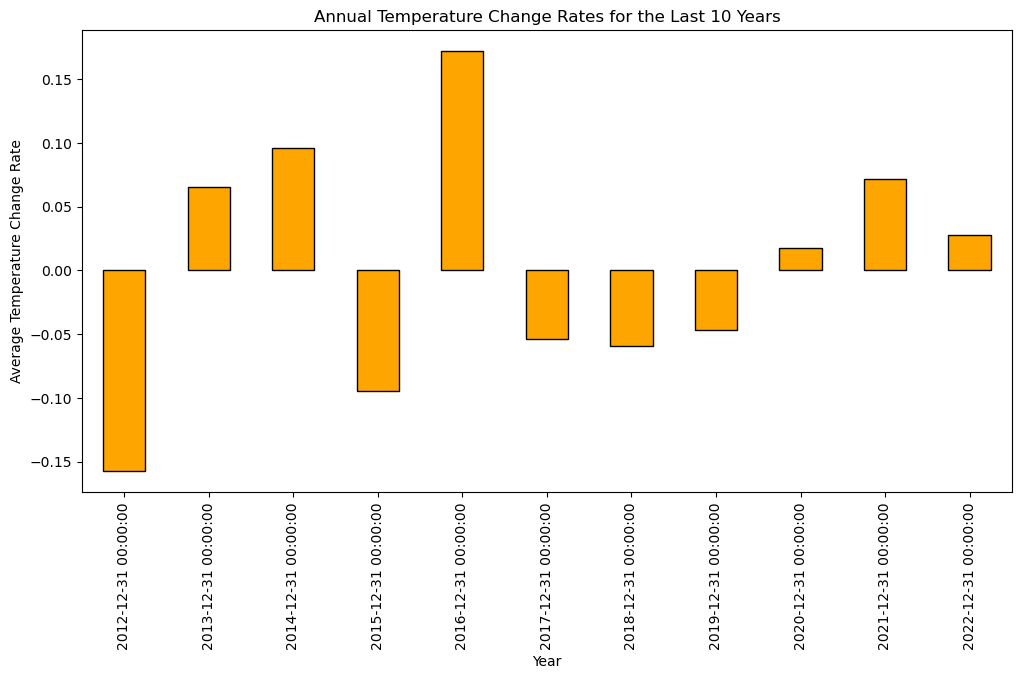

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('dataResearch.csv')

# Assuming your DataFrame has columns 'Date' and 'Temperature (Average)'
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate the rate of change (variation rate)
df['Variation Rate'] = df['Temperature(Average)'].diff()

# Select data for the last 10 years
last_10_years = df.index.year >= df.index.year.max() - 10
last_10_years_data = df[last_10_years]

# Calculate the annual temperature change rate
annual_change_rate = last_10_years_data.resample('Y')['Variation Rate'].mean()

# Print the annual temperature change rates
print("Annual Temperature Change Rates for the Last 10 Years:")
print(annual_change_rate)

# Plot the annual temperature change rates
plt.figure(figsize=(12, 6))
annual_change_rate.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Annual Temperature Change Rates for the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change Rate')
plt.show()


# plotting start here 

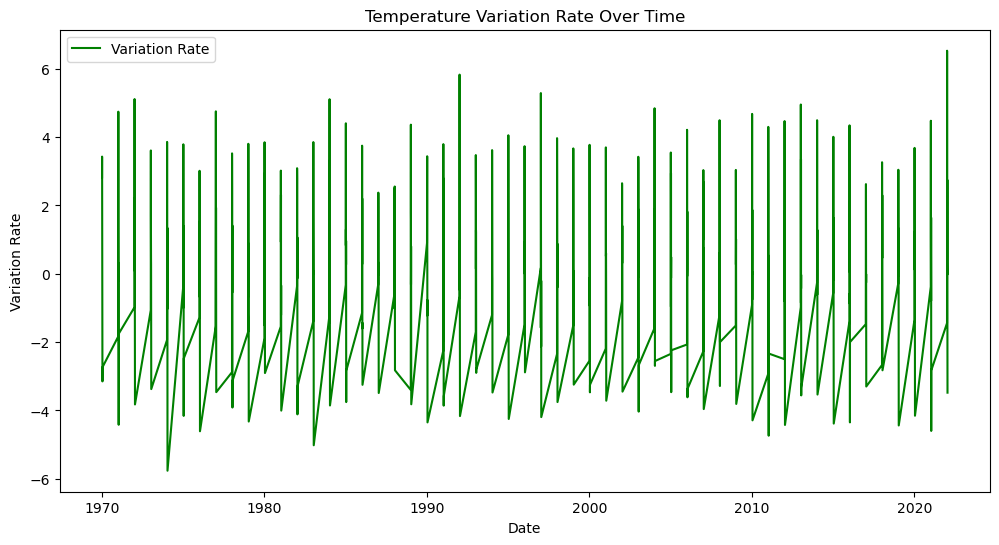

In [40]:
# Plot 2: Variation Rate Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Variation Rate'], label='Variation Rate', color='green')
plt.title('Temperature Variation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Variation Rate')
plt.legend()
plt.show()



In [33]:

# Descriptive statistics
print("Mean:", df['Temperature(Average)'].mean())
print("Median:", df['Temperature(Average)'].median())
print("Standard Deviation:", df['Temperature(Average)'].std())
print("Min:", df['Temperature(Average)'].min())
print("Max:", df['Temperature(Average)'].max())


Mean: 25.306367924528303
Median: 26.509999999999998
Standard Deviation: 3.3340666237824266
Min: 16.98
Max: 30.375


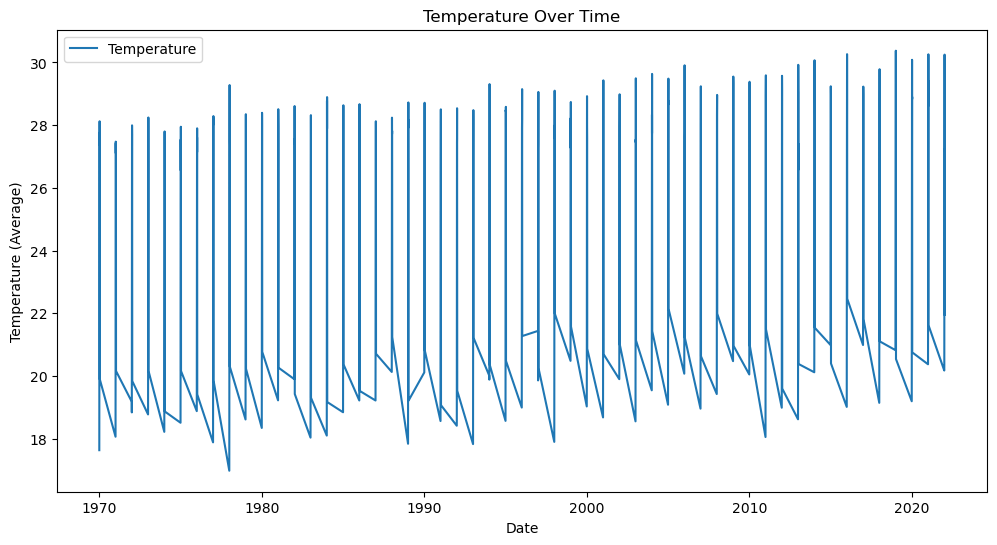

In [34]:
# Line plot of temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature(Average)'], label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (Average)')
plt.legend()
plt.show()


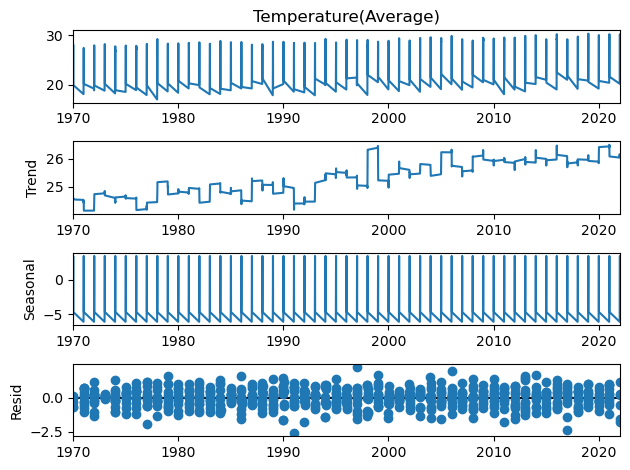

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
result = seasonal_decompose(df['Temperature(Average)'], model='additive', period=12)
result.plot()
plt.show()


In [46]:
import pandas as pd

# Load your data
df = pd.read_csv('dataResearch.csv')

# Calculate the correlation matrix
correlation_matrix = df[['Year', 'Temperature(Average)']].corr()

# Display the correlation matrix
print(correlation_matrix)


                          Year  Temperature(Average)
Year                  1.000000              0.168529
Temperature(Average)  0.168529              1.000000


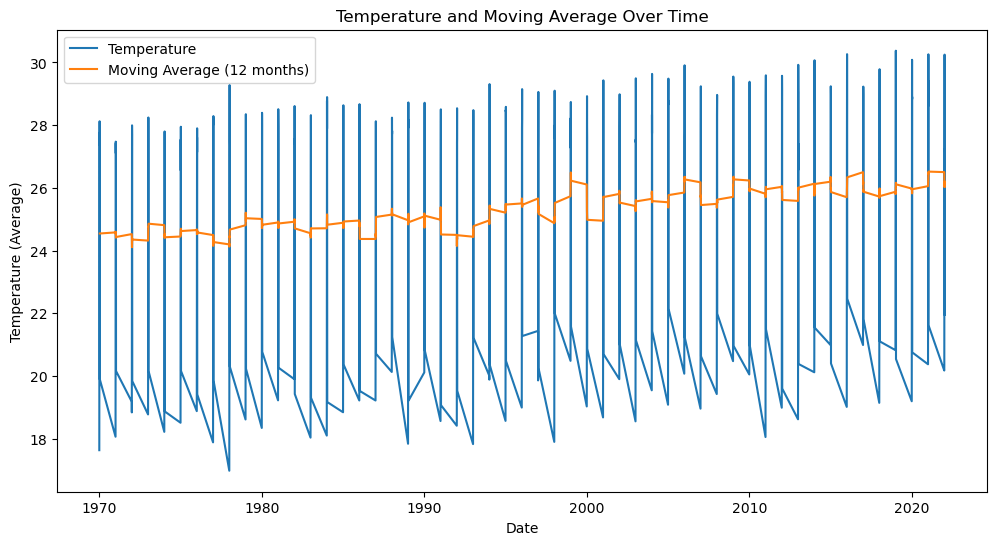

In [37]:
# Calculate and plot moving averages
window_size = 12  # You can adjust the window size
rolling_mean = df['Temperature(Average)'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature(Average)'], label='Temperature')
plt.plot(df.index, rolling_mean, label=f'Moving Average ({window_size} months)')
plt.title('Temperature and Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (Average)')
plt.legend()
plt.show()


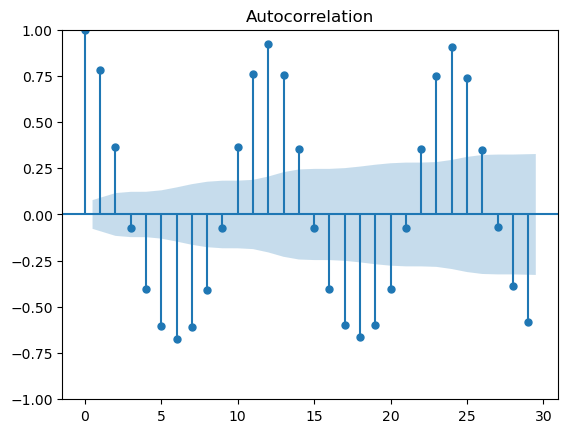

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot
plot_acf(df['Temperature(Average)'])
plt.show()
